>When I want to visualize some metric over time (sometimes even across different cohorts

In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import display, Image
import plotly.graph_objs as go

In [2]:
control = pd.read_csv('../data/line-graph-1.csv')
treatment = pd.read_csv('../data/line-graph-2.csv')
engagement = pd.read_csv('../data/line-graph-3.csv')
cohorts = pd.read_csv('../data/line-graph-4.csv')

## One Line

In [3]:
fig = go.Figure()

fig.add_trace(
   go.Scatter(
       x=engagement['timestamp_day'],
       y=engagement['daily_engagement'],
       mode='lines',
       name=''
   )
)
 

fig.update_layout(title='',
                  xaxis_title='Month',
                  yaxis_title='Engagement',
                  annotations=[
                      go.layout.Annotation(
                            x='2018-12-25',
                            y=0.34,
                            xref="x",
                            yref="y",
                            text="Christmas",
                            showarrow=True,
                            arrowhead=7,
                            ax=0,
                            ay=60
                     ),
                  ]
                 )
fig.show()

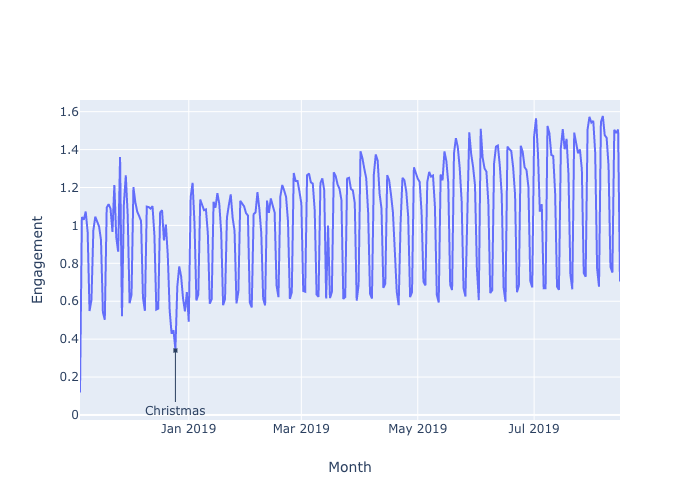

In [4]:
Image(filename='../images/line-figure-1.png')

## Two Lines

In [5]:
# Plot the mean time per day per variant (control/treatment)
fig = go.Figure()

# Control
fig.add_trace(
    go.Scatter(
        x=control['dt'],
        y=control['mean_total_active_mins'],
        mode='lines',
        name='control',
    )
)

# Treatment
fig.add_trace(
    go.Scatter(
        x=treatment['dt'],
        y=treatment['mean_total_active_mins'],
        mode='lines',
        name='treatment')
)

# Plot labels
fig.update_layout(title='',
                  xaxis_title='Date',
                  yaxis_title='Minutes',
                  annotations=[
                      
                  ],
                 shapes=[
                     go.layout.Shape(
                        type="line",
                        x0='2019-02-05',
                        y0=0,
                        x1='2019-02-05',
                        y1=35,
                        line=dict(
                            color="MediumPurple",
                            width=4,
                            dash="dot",
                            ))])

fig.update_yaxes(range=[10, 33])

fig.show()

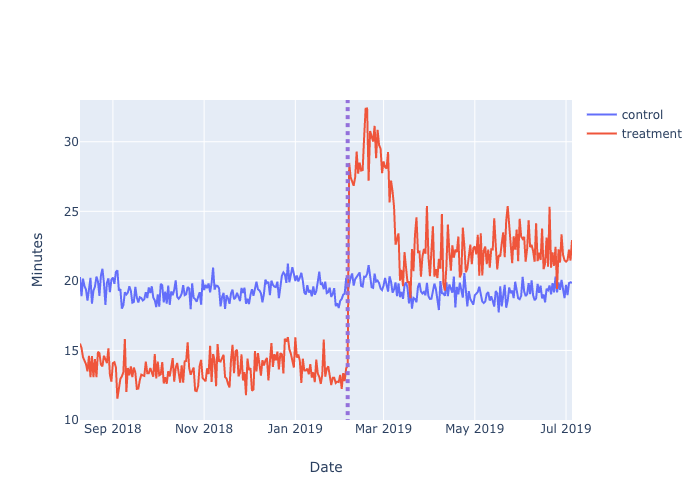

In [6]:
Image(filename='../images/line-figure-2.png')

## Multiple Lines

In [7]:
initial_cohorts = [u'2018-11-05 00:00:00',
                   u'2018-11-12 00:00:00',
                   u'2018-11-19 00:00:00',
                   u'2018-11-26 00:00:00',
                   u'2018-12-03 00:00:00']

fig = go.Figure()
for cohort in initial_cohorts:
    temp_category = cohorts[cohorts['shop_cohort'] == cohort]
    fig.add_trace(
        go.Scatter(
            x=temp_category['timestamp_day'],
            y=temp_category['daily_engagement'],
            mode='lines',
            name='Cohort {}'.format(cohort[5:10])))

fig.update_layout(title='',
                  xaxis_title='Date',
                  yaxis_title='Engagement',
                  annotations=[                      
                  ])

fig.write_image('line-figure-3.png')


fig.show()

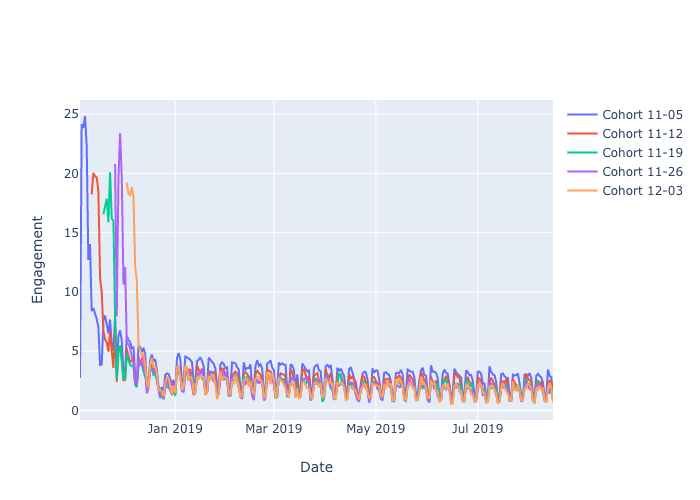

In [8]:
Image(filename='../images/line-figure-3.png')

In [1]:
# TODO: Add reusable code for adding error bars to lines